# Feature Matching

In [1]:
#Importing all the dependencies
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Function to display images in a large scale
def display(img,cmap=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

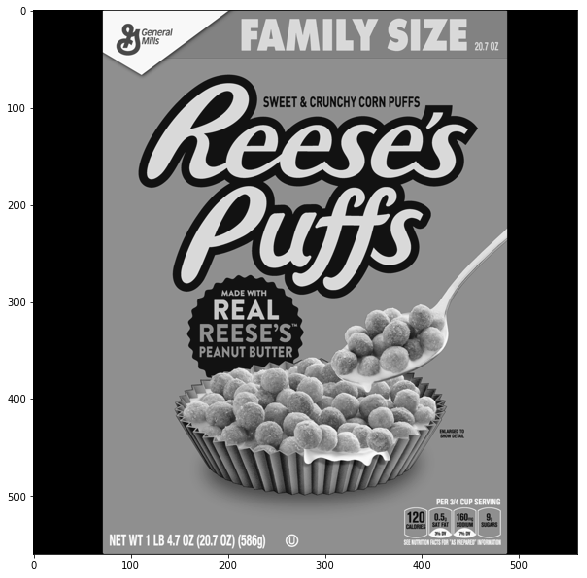

In [3]:
#Reading and displaying the target image
reese = cv2.imread('reeses_puffs.png',0)
display(reese,cmap='gray')

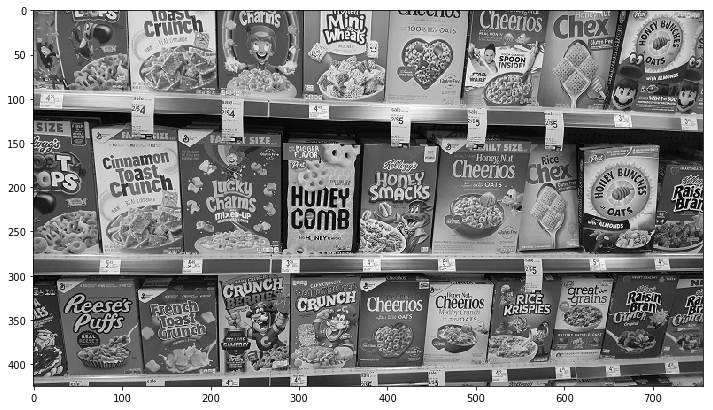

In [4]:
#Reading and displaying the Query image
cereals = cv2.imread('many_cereals.jpg',0)
display(cereals,cmap='gray')

# Brute Force Matcher with ORB Descriptors

In [5]:
#Create ORB descriptor object
orb = cv2.ORB_create()

#Find the keypoints and descriptors with ORB
kp1,des1 = orb.detectAndCompute(reese,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [6]:
#Create BFmatcher object
bf = cv2.BFMatcher(cv2.HAMMING_NORM_TYPE,crossCheck=True)

#Brute Force Matching
matches = bf.match(des1,des2)

#Sort them in the order of their distance(accuracy)
matches = sorted(matches,key=lambda x:x.distance)

#Draw first 25 matches
BF_matches = cv2.drawMatches(reese,kp1,cereals,kp2,matches[:25],None,flags=2)

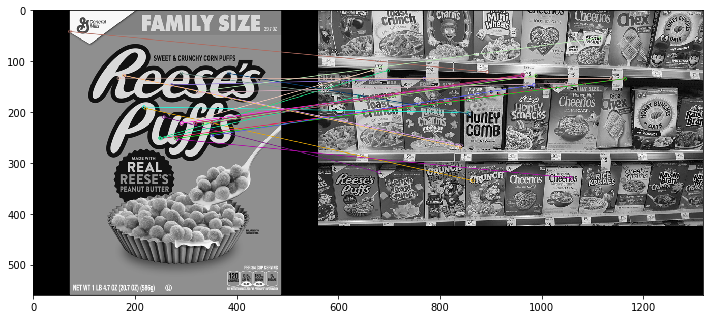

In [7]:
display(BF_matches)

# Brute Force Matching with SIFT(Scale Invariant Feature transform) and Ratio Test

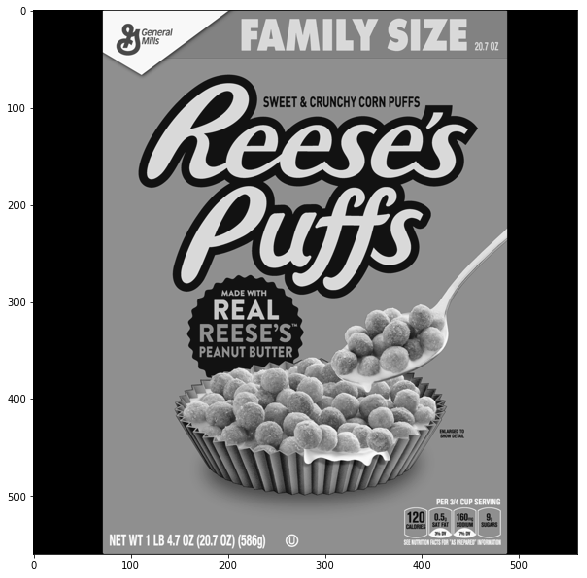

In [8]:
reese = cv2.imread('reeses_puffs.png',0)
display(reese,cmap='gray')

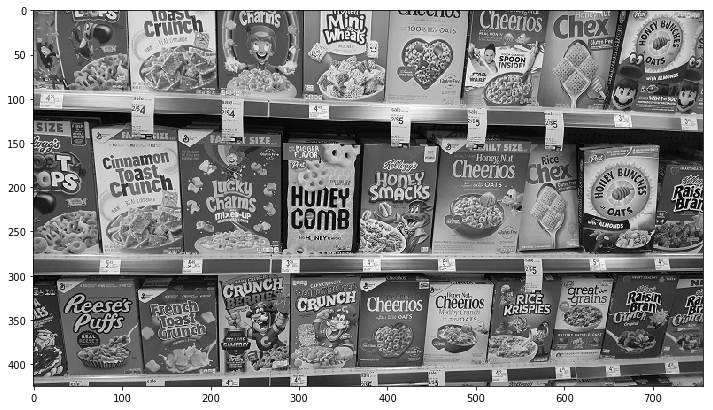

In [9]:
cereals = cv2.imread('many_cereals.jpg',0)
display(cereals,cmap='gray')

## SIFT keypoint and descriptor

In [10]:
#create SIFT object
sift = cv2.xfeatures2d_SIFT.create()

#find the keypoints and descriptors with SIFT
kp1 , des1 = sift.detectAndCompute(reese,None)
kp2 , des2 = sift.detectAndCompute(cereals,None)

In [11]:
#initialize BF with default param because the default parameters are best suited for SIFT
bf = cv2.BFMatcher()    

#Taking the best of two matches in a query 
matches = bf.knnMatch(des1,des2,k=2)

In [12]:
#Ratio Test
good = []

for match1,match2 in matches:
    
    if match1.distance < 0.75*match2.distance:  #if match1 distance is 75% less than match2's then it is a good match hence appended
        good.append([match1])

In [13]:
#Drawing the matches
sift_match = cv2.drawMatchesKnn(reese,kp1,cereals,kp2,good,None,flags=2)

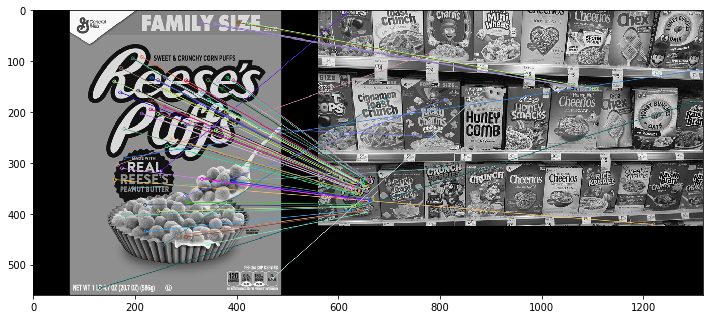

In [14]:
display(sift_match)

## Changing representation style

In [15]:
matchesMask = [[0,0] for i in range(len(matches))]

# Ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

In [16]:
#Drawing the matches
sift_matched  = cv2.drawMatchesKnn(reese,kp1,cereals,kp2,matches,None,**draw_params)

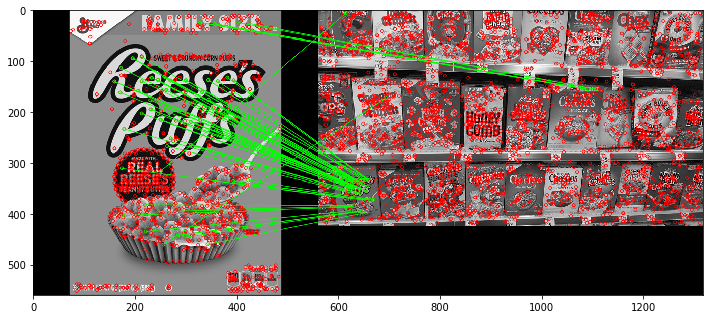

In [17]:
display(sift_matched)

# Flann Based Matching

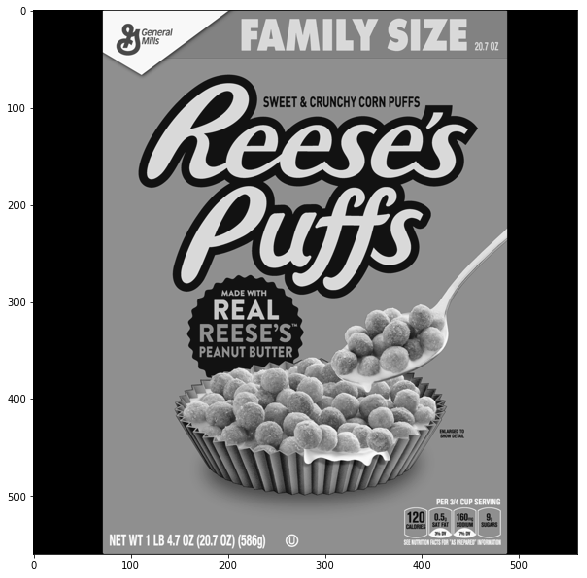

In [27]:
reese = cv2.imread('reeses_puffs.png',0)
display(reese,cmap='gray')

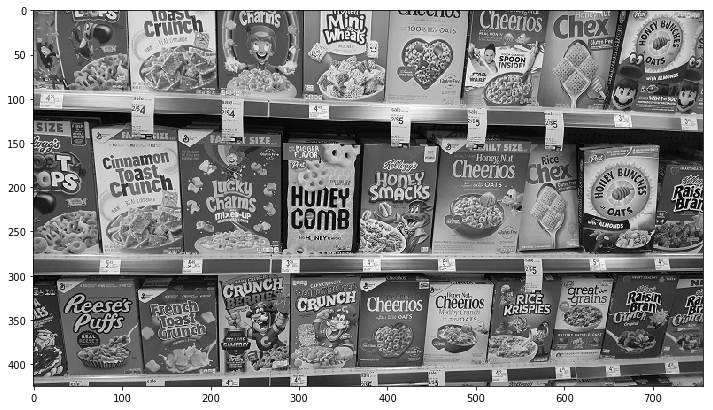

In [29]:
cereals = cv2.imread('many_cereals.jpg',0)
display(cereals,cmap='gray')

In [18]:
#Create SIFT object
sift = cv2.xfeatures2d_SIFT.create()

#Finding keypoints and descriptors
kp1 , des1 = sift.detectAndCompute(reese,None)
kp2 , des2 = sift.detectAndCompute(cereals,None)

In [19]:
#Flann based Matcher initializing parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, tress = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params,search_params)

#Flann based matching
matches = flann.knnMatch(des1,des2,k = 2)

In [20]:
#Ratio Test
good_match = []

for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good_match.append([match1])

In [21]:
#Drawing the matches
flann_match = cv2.drawMatchesKnn(reese,kp1,cereals,kp2,good_match,None,flags=2)

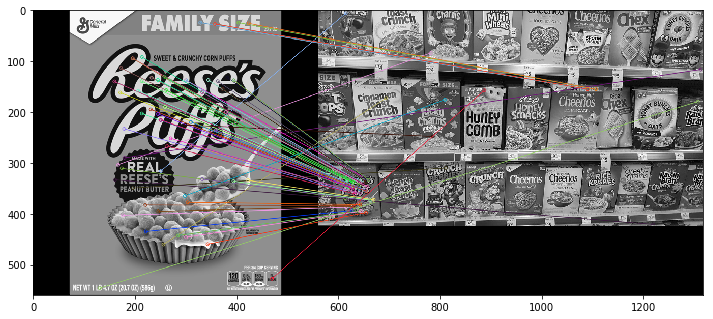

In [22]:
display(flann_match)

## Changing representation style

In [23]:
matchMask = [[0,0] for i in range(len(matches))]

for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.75*match2.distance:
        matchMask[i] = [1,0]
        
draw_param = dict(matchColor = (0,255,0),
                  singlePointColor = (255,0,0), 
                  matchesMask=matchMask, flags=0)

In [24]:
#Drawing the matches
flann_match = cv2.drawMatchesKnn(reese,kp1,cereals,kp2,matches,None,**draw_param)

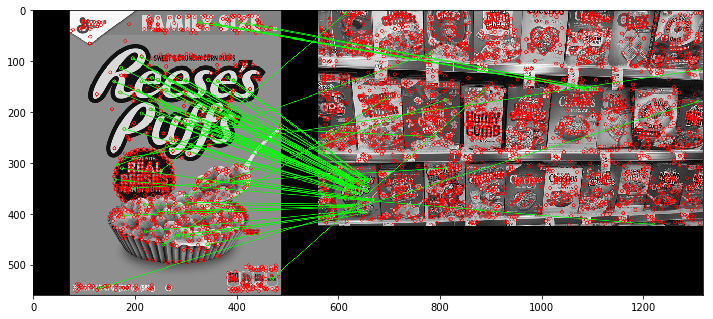

In [25]:
display(flann_match)